In [1]:
# import sys
# !{sys.executable} -m pip install --upgrade tensorflow 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
import janitor
import tabulate
from tqdm import tqdm
from IPython.display import display, HTML
# display(HTML("<style>.container { width:85% !important; }</style>"))
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

RS = range(0,25,1)
ep = 300

2022-06-06 14:15:28.319697: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
print(tf.__version__)


2.9.1


In [3]:
Glam = pd.read_csv('Glam.csv')
Glam = Glam[[
#         'LAT',
#         'LON',
    'CenLon',
    'CenLat',
    'Area',
    'thickness',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax'
]]
deviations_Glam = pd.read_csv('zults/deviations_Glam.csv')
deviations_Glam = deviations_Glam[[
    'layer architecture',
    'model parameters',
    'learning rate',
    'validation split',
    'test mae avg',
    'train mae avg',
    'test mae std dev',
    'train mae std dev',
    'test predicted thickness std dev',
    'train predicted thickness std dev'
]]
RGI_prethicked_Glam = pd.read_csv('zults/RGI_prethicked_Glam.csv')
RGI_prethicked_Glam = RGI_prethicked_Glam[[
#         'LAT',
#         'LON',
    'CenLon',
    'CenLat',
    'Area',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax',
    'avg predicted thickness',
    'predicted thickness std dev',
    'variance'
]]

RGI_prethicked_Glam_phys = pd.read_csv('zults/RGI_prethicked_Glam_phys.csv')
RGI_prethicked_Glam_phys = RGI_prethicked_Glam_phys[[
#         'LAT',
#         'LON',
#     'CenLon',
#     'CenLat',
    'Area',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax',
    'avg predicted thickness',
    'predicted thickness std dev',
#     'variance'
]]

deviations_Glam_phys = pd.read_csv('zults/deviations_Glam_phys.csv')
deviations_Glam_phys = deviations_Glam_phys[[
#         'LAT',
#         'LON',
    'layer architecture',
    'model parameters',
    'learning rate',
    'validation split',
    'test mae avg',
    'train mae avg',
    'test mae std dev',
    'train mae std dev',
    'test predicted thickness std dev',
    'train predicted thickness std dev'
]]





deviations_glacier = pd.read_csv('zults/deviations_glacier.csv')
deviations_glacier = deviations_glacier[[
#         'LAT',
#         'LON',
    'layer architecture',
    'model parameters',
    'learning rate',
    'validation split',
    'test mae avg',
    'train mae avg',
    'test mae std dev',
    'train mae std dev',
    'test predicted thickness std dev',
    'train predicted thickness std dev'
]]

# Glam = pd.read_csv('Glam.csv')
# Glam = pd.read_csv('Glam.csv')
# Glam = pd.read_csv('Glam.csv')

In [25]:
deviations_Glam.sort_values(['learning rate', 'test mae avg'])

,layer architecture,model parameters,learning rate,validation split,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
0,32-16-8,1012.0,0.001,0.2,12.207832,13.195737,0.325927,0.427031,0.591357,0.486747
1,24-12-6,644.0,0.001,0.2,12.415105,13.689977,0.410488,0.380411,0.567290,0.473328
2,12-8,252.0,0.001,0.2,12.857983,14.885575,0.274563,0.286594,0.592051,0.572013
3,16-8,324.0,0.001,0.2,12.882614,14.671638,0.255216,0.218825,0.364422,0.352042
4,12-6,224.0,0.001,0.2,12.949541,15.135346,0.284604,0.285441,0.520103,0.430230
5,10-5,180.0,0.001,0.2,13.091524,15.287114,0.382744,0.327079,0.488009,0.434573
14,8-4,140.0,0.001,0.2,14.579442,16.821427,6.111449,6.122259,7.824829,7.255960
6,12-6,224.0,0.010,0.2,13.258951,12.697351,0.994131,0.708047,1.165205,0.954331
7,10-5,180.0,0.010,0.2,13.308621,12.831752,0.602335,0.627691,0.797038,0.746737
8,16-8,324.0,0.010,0.2,13.468252,11.856180,0.910006,0.837275,0.966888,0.882962


In [22]:
dnn_model

{'10-5_Glam_dnn_MULTI_0.01_0.2_300_0': <keras.engine.sequential.Sequential at 0x7f1cdc7ed190>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_1': <keras.engine.sequential.Sequential at 0x7f1dac550650>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_10': <keras.engine.sequential.Sequential at 0x7f1d24552350>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_11': <keras.engine.sequential.Sequential at 0x7f1d241d9910>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_12': <keras.engine.sequential.Sequential at 0x7f1d24712e10>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_13': <keras.engine.sequential.Sequential at 0x7f1cdc7a9c10>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_14': <keras.engine.sequential.Sequential at 0x7f1dac3483d0>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_15': <keras.engine.sequential.Sequential at 0x7f1cdc7a99d0>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_16': <keras.engine.sequential.Sequential at 0x7f1d0434bc10>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_17': <keras.engine.sequential.Sequential at 0x7f1c5849d7d0>,
 '10-5_Glam_dnn_MULTI_0.01_0.2_300_18': <k

loading and evaluating models...


100%|██████████| 75/75 [00:05<00:00, 14.70it/s] 
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


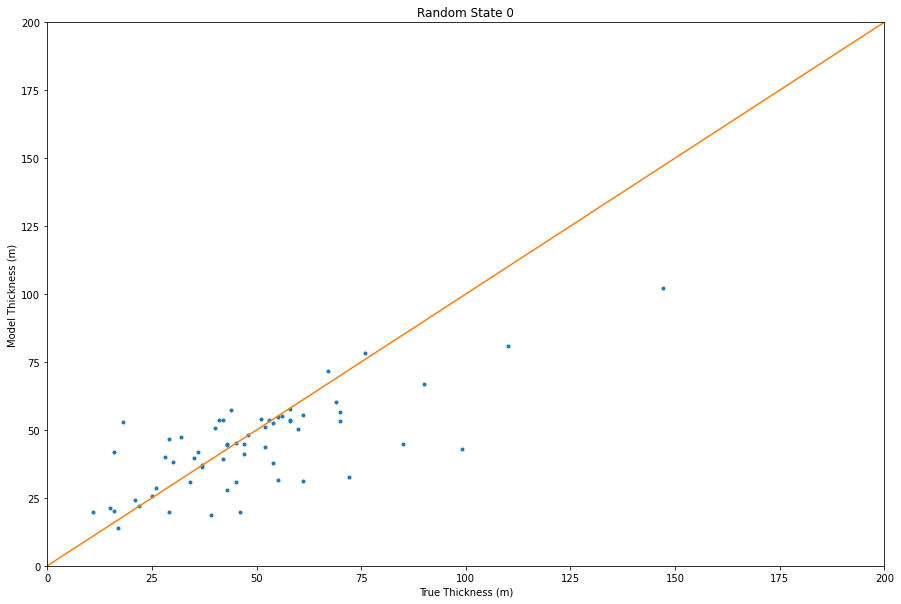

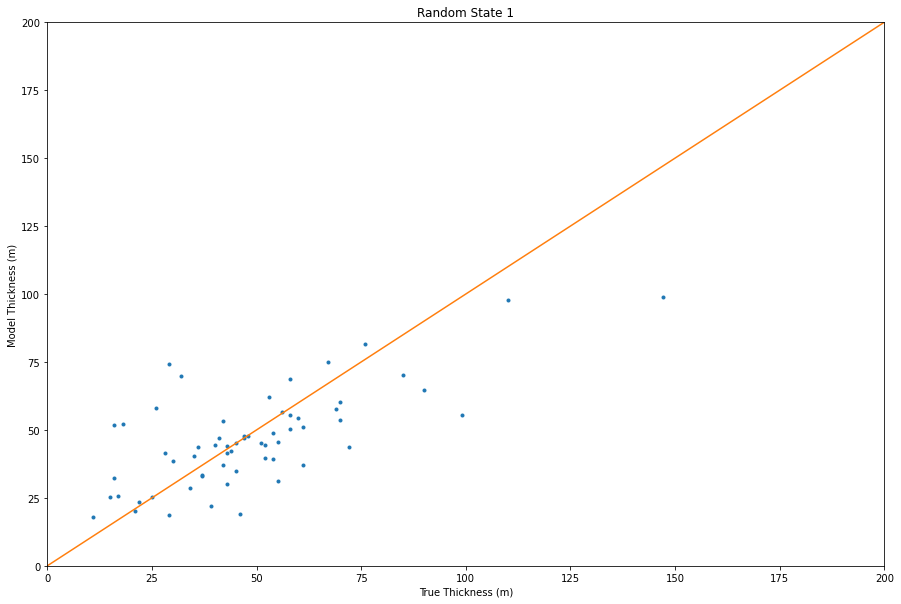

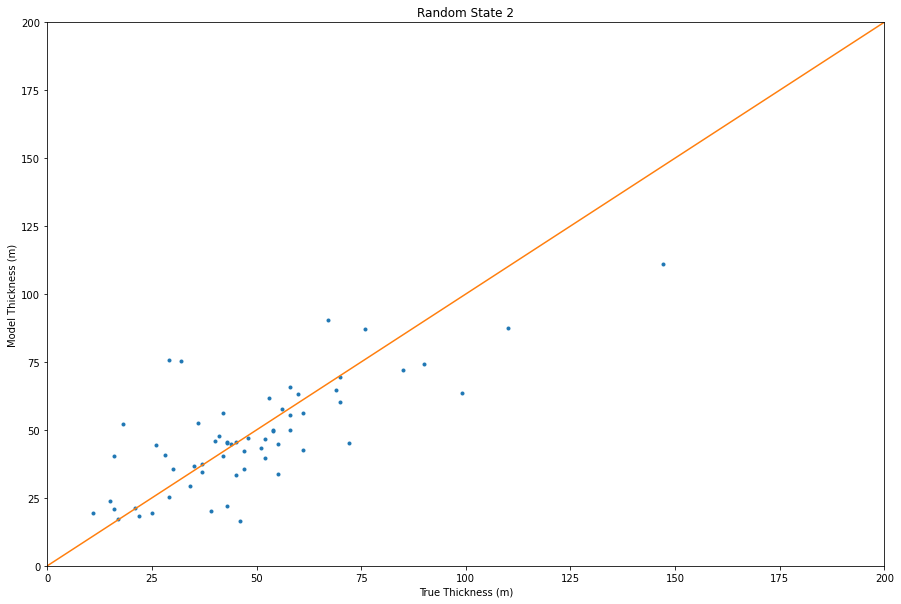

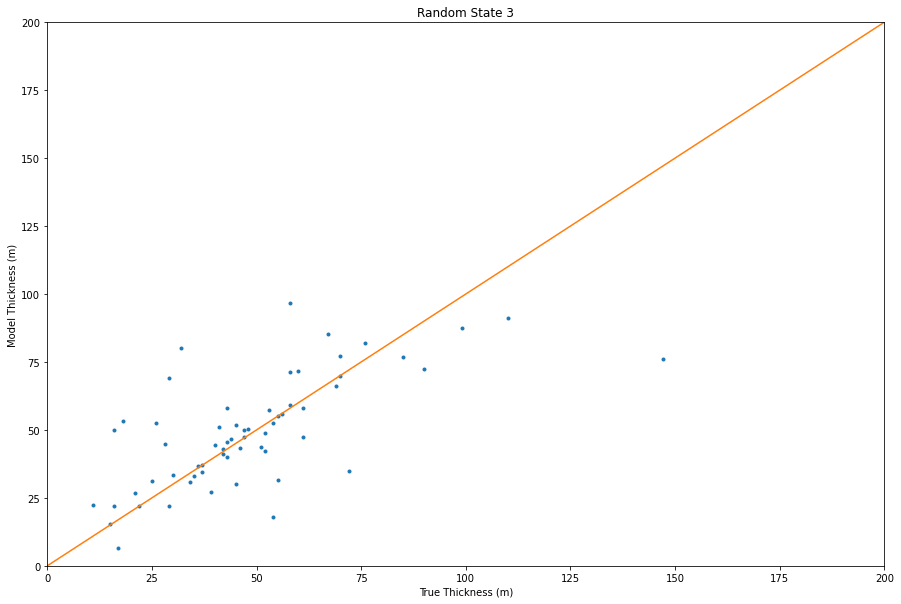

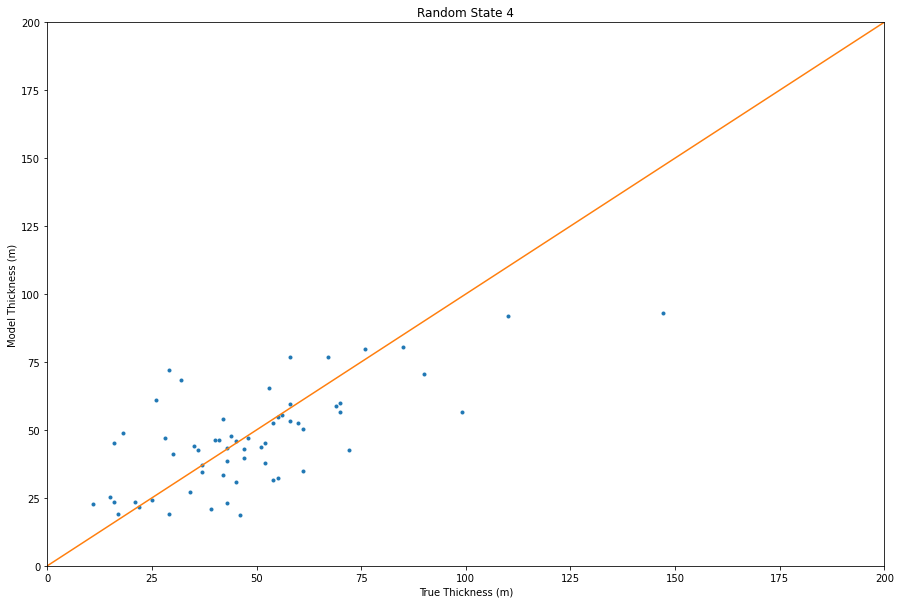

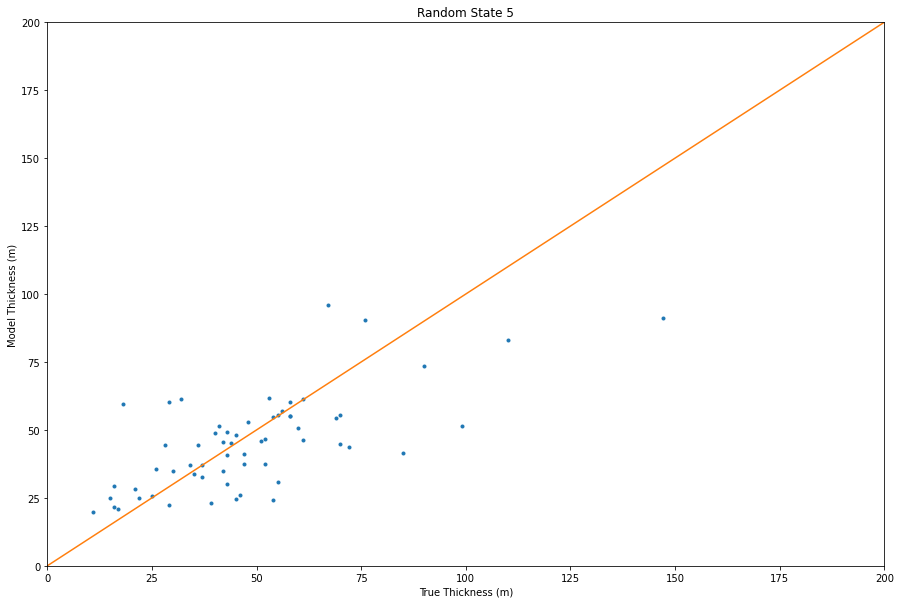

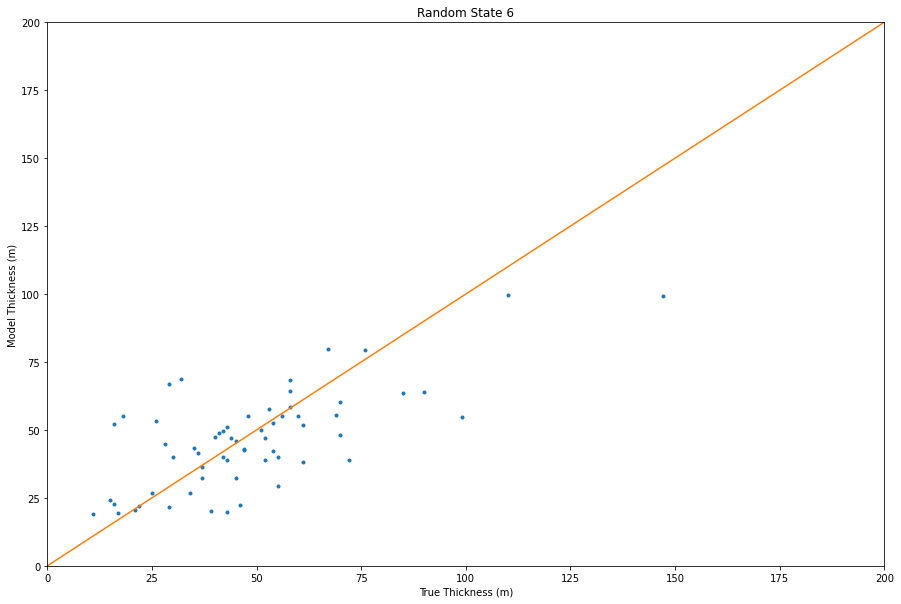

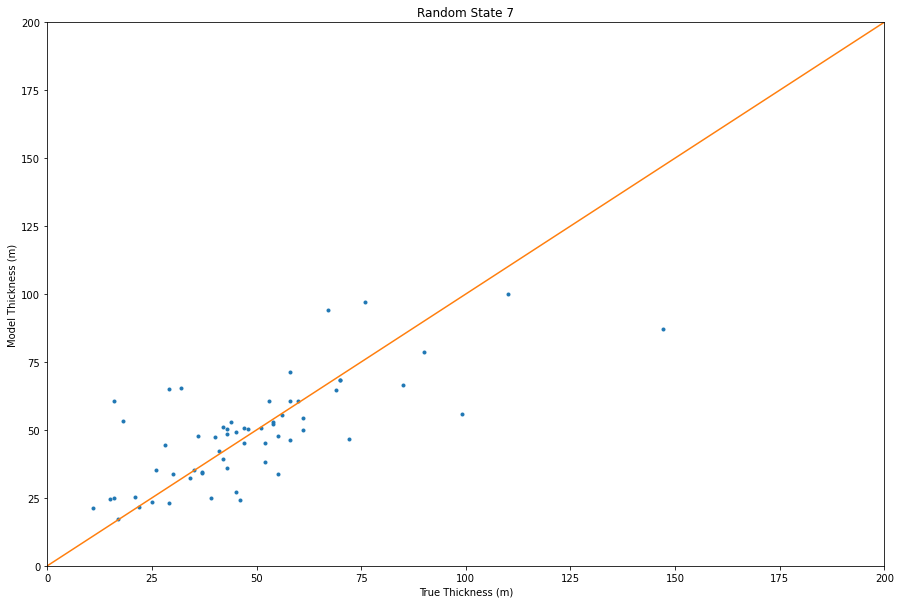

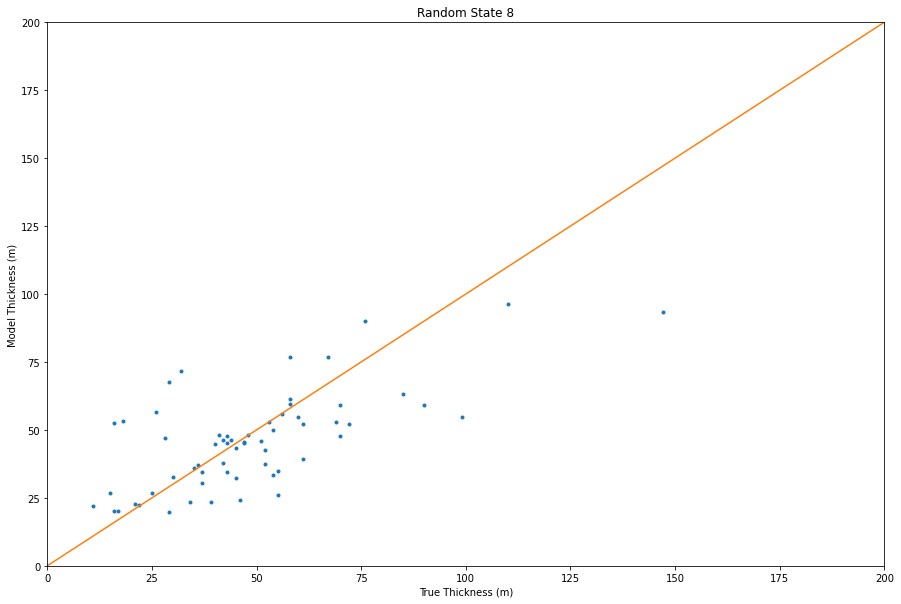

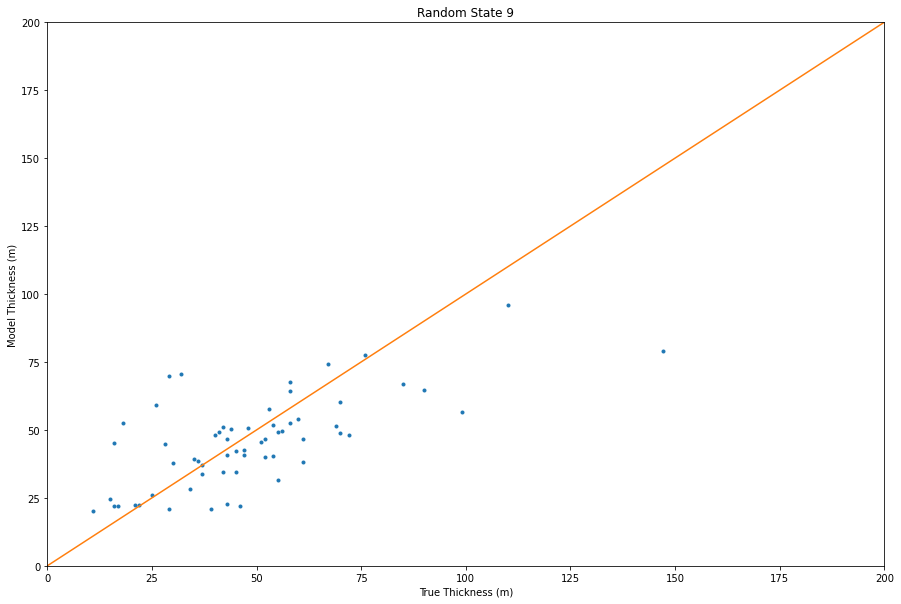

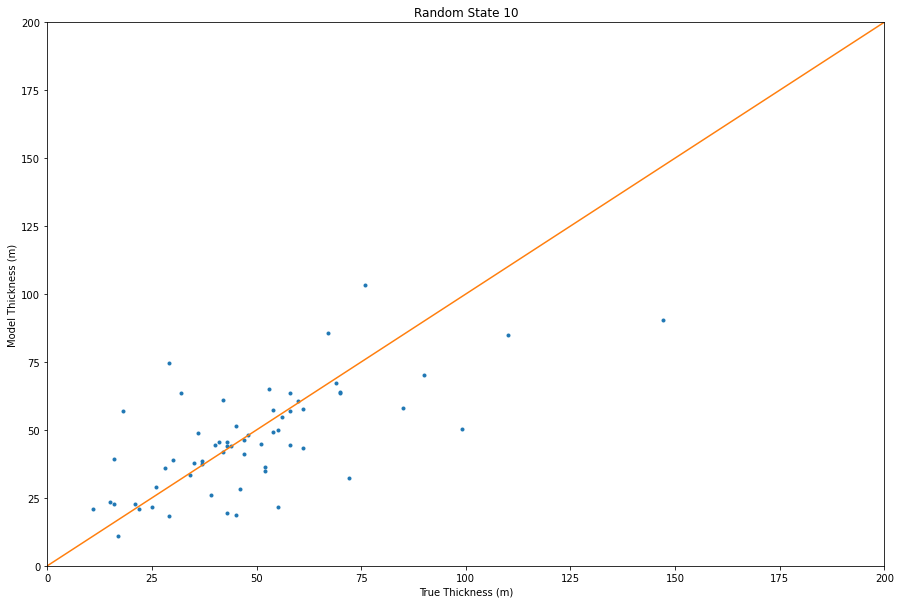

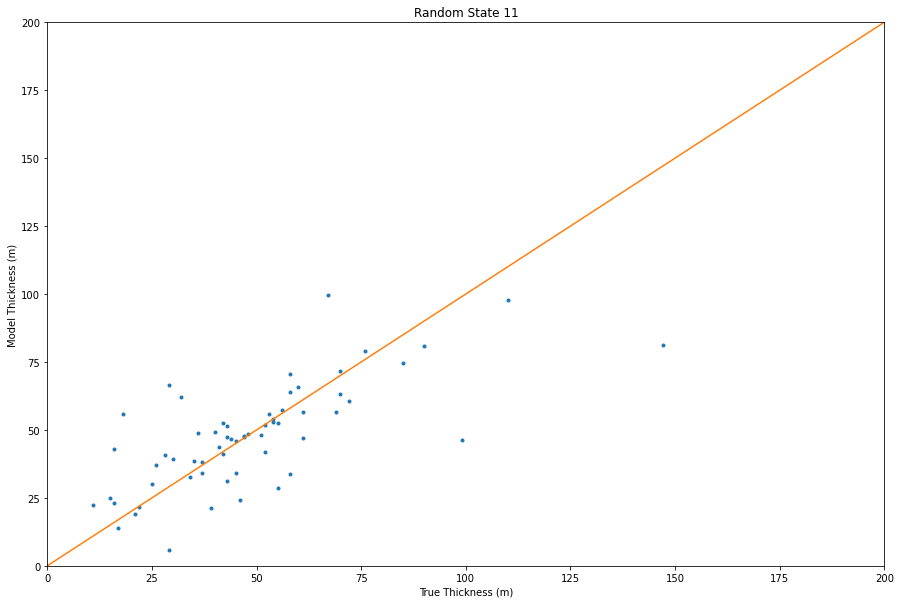

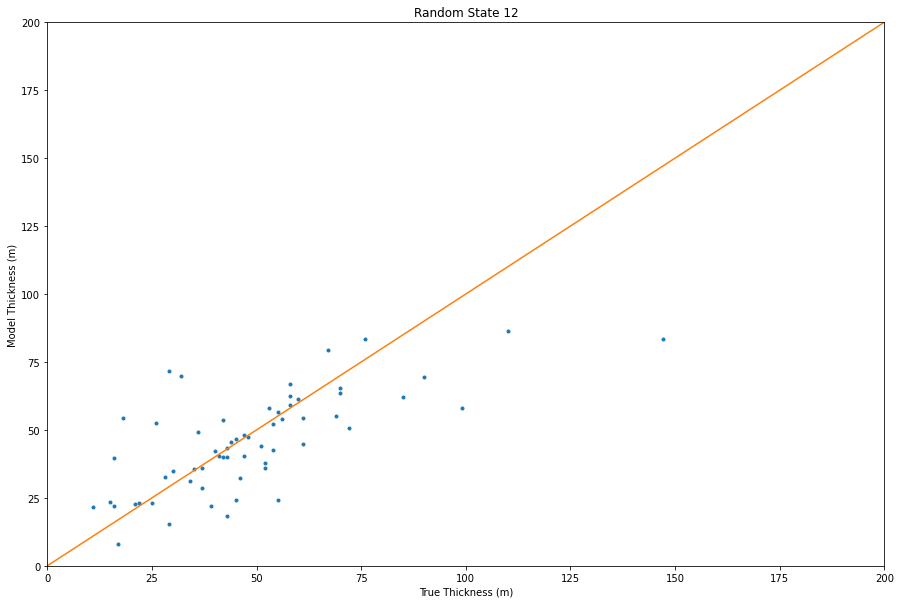

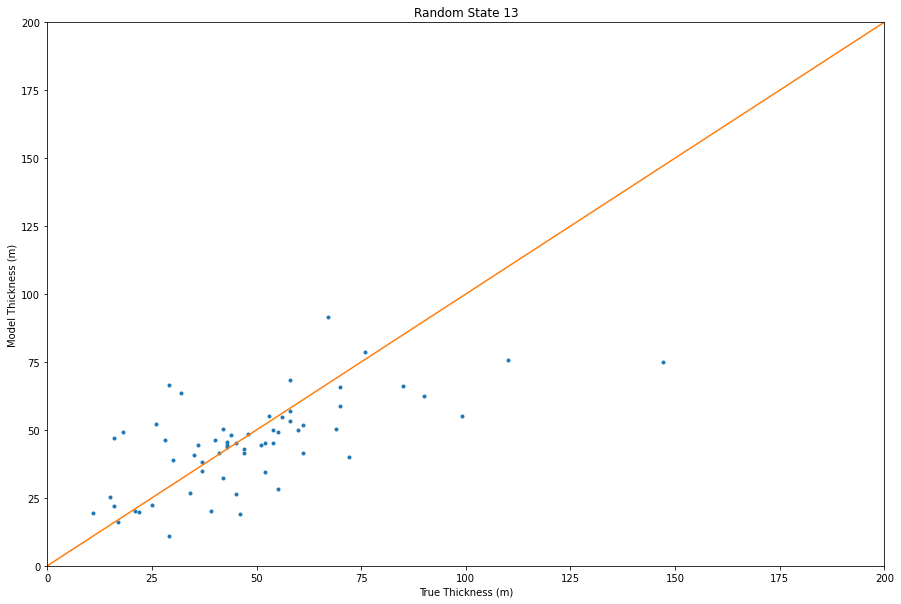

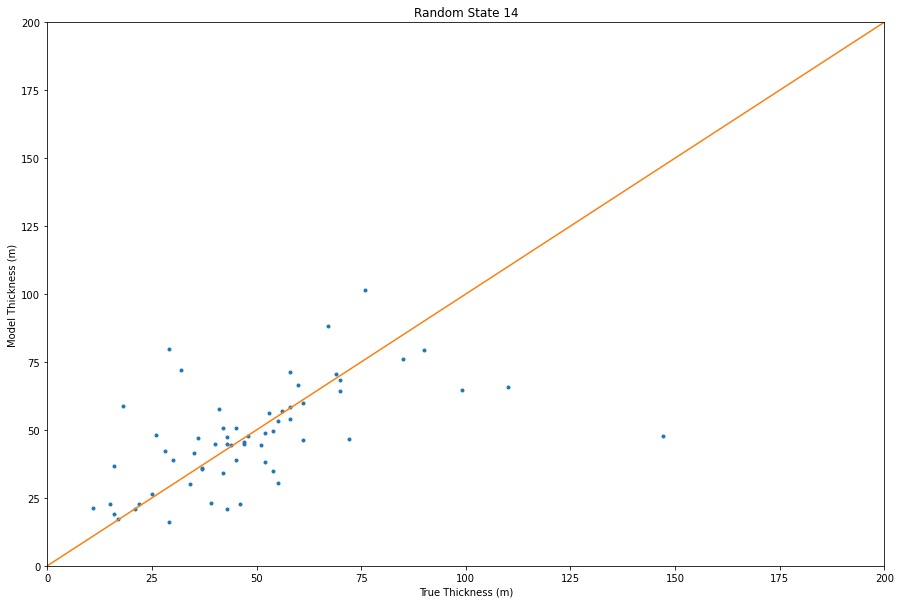

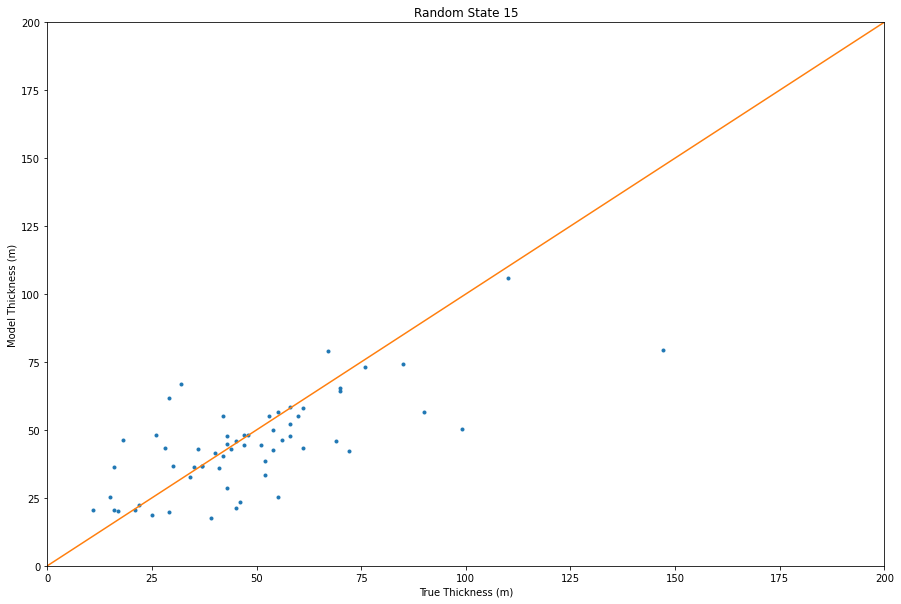

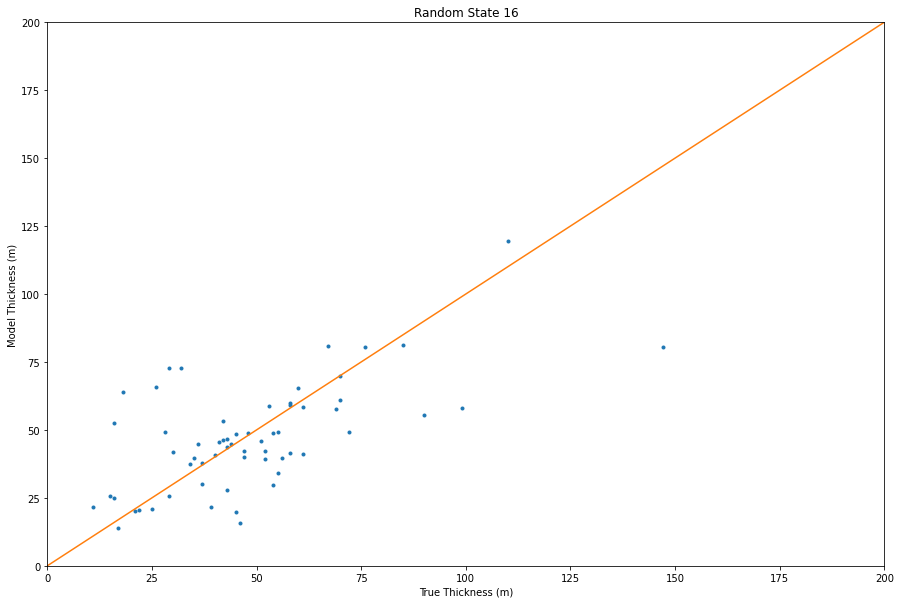

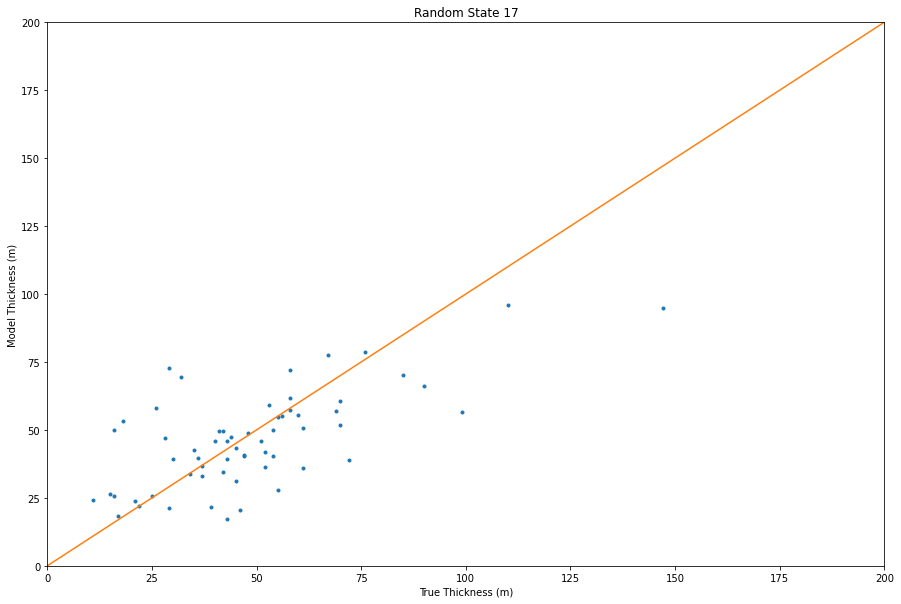

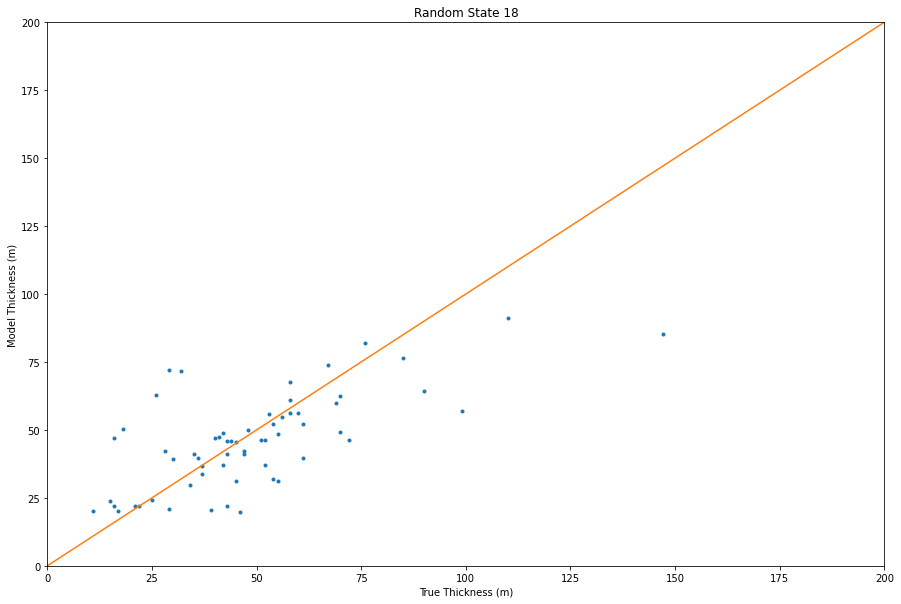

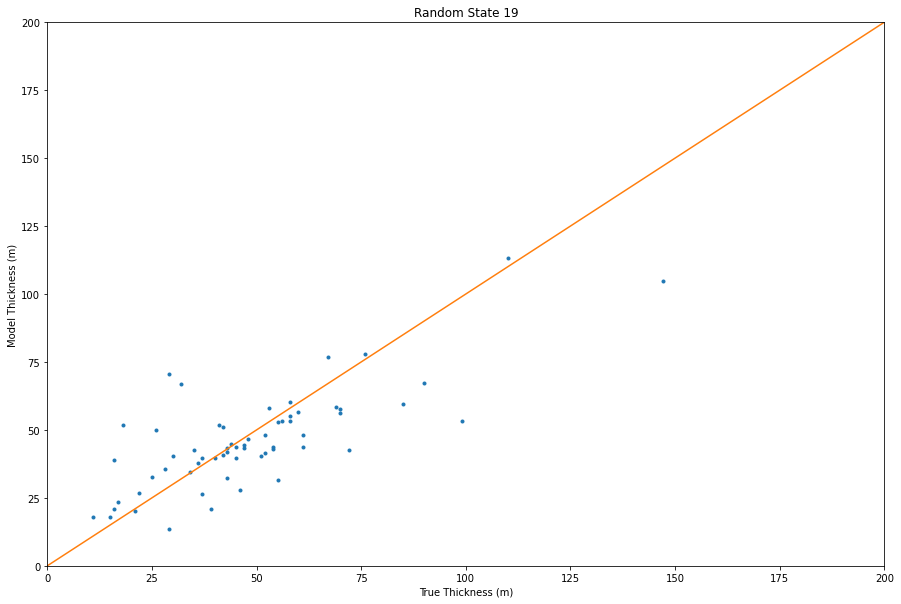

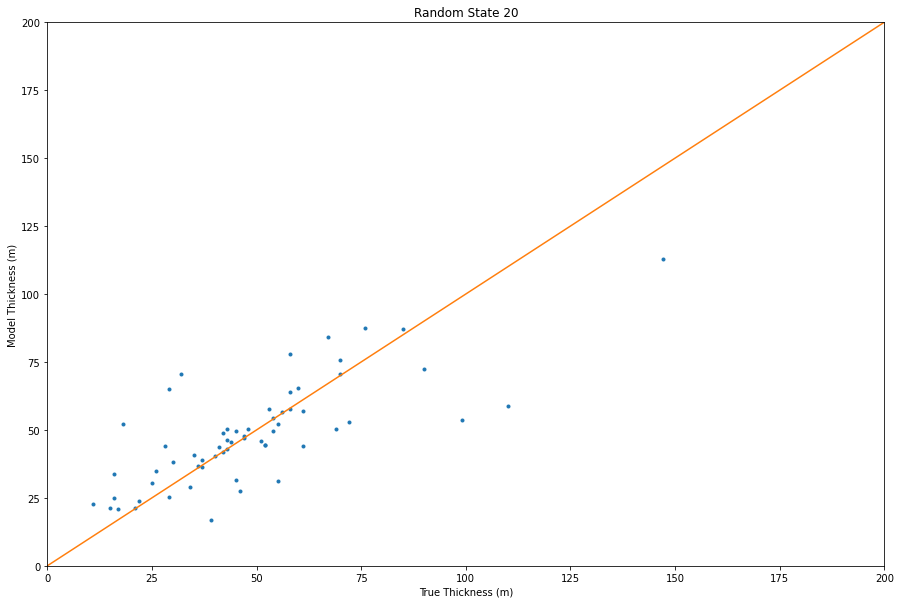

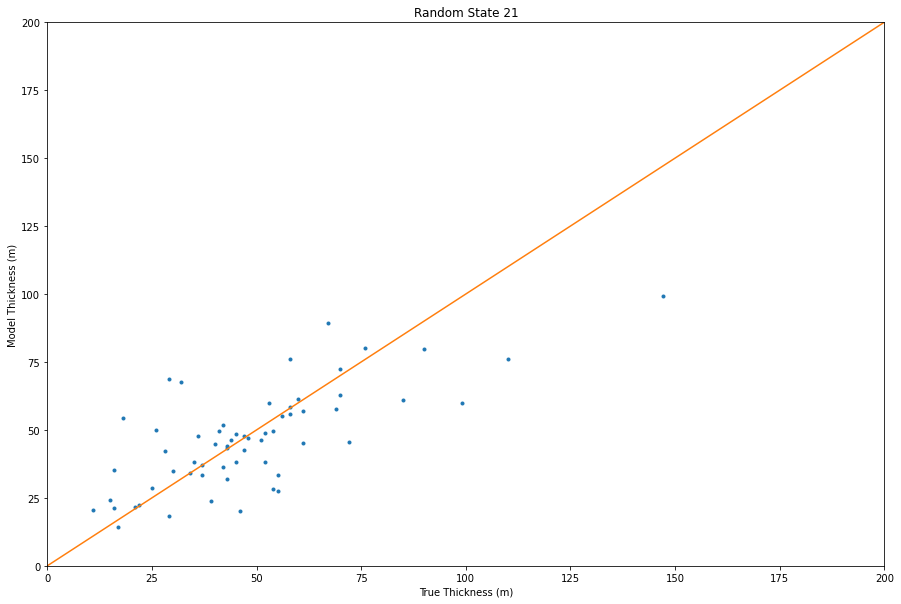

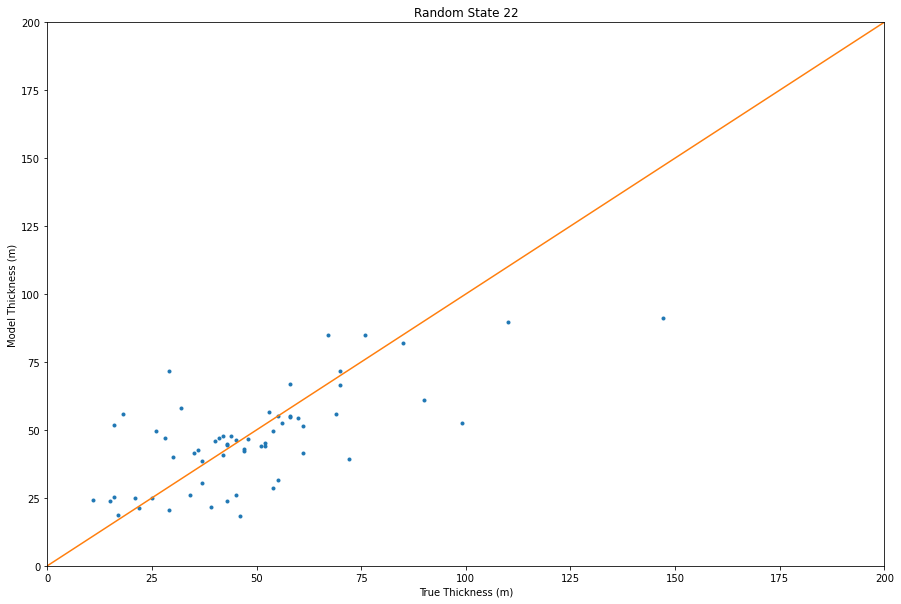

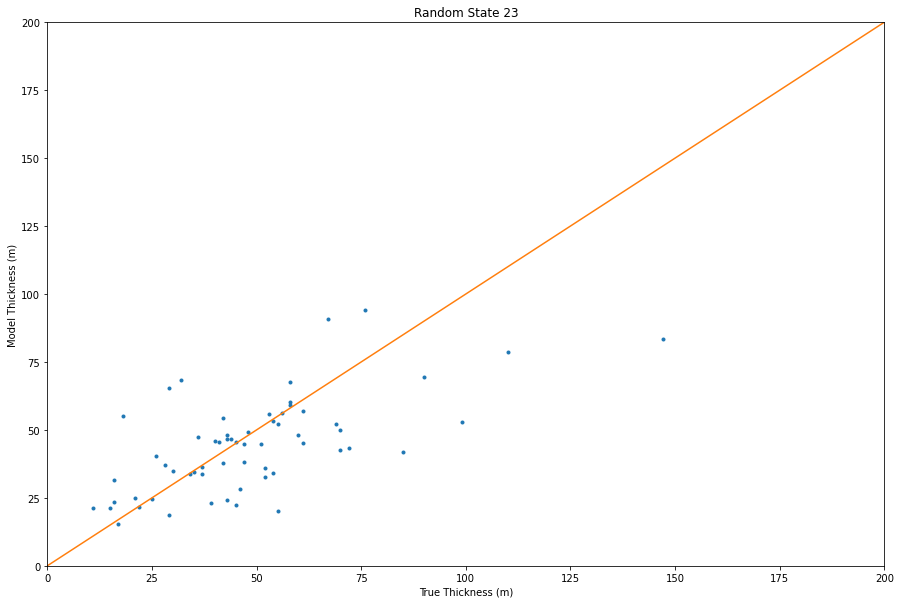

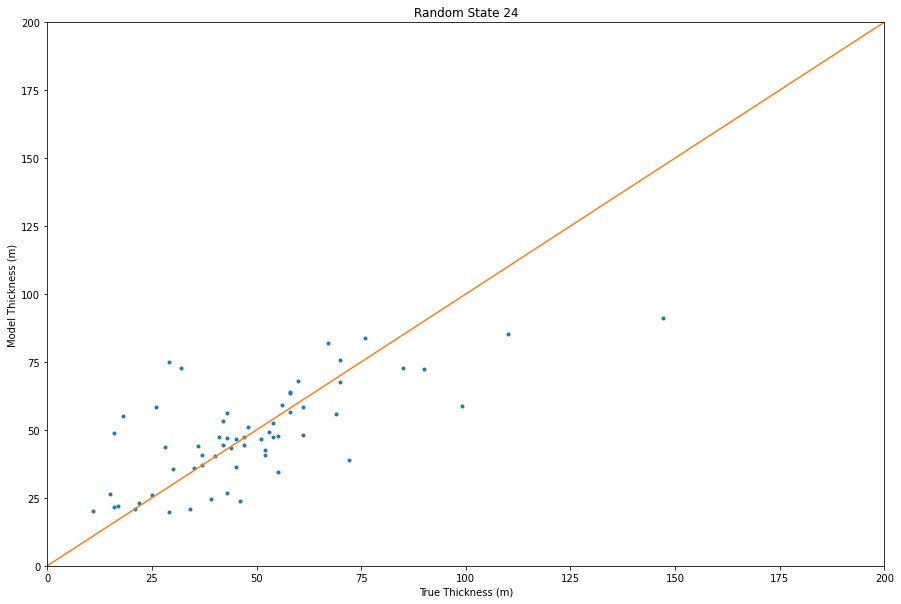

In [30]:
"""
Here we load top rated model and look at predicted accuracies of each random state
"""
arch = deviations_Glam['layer architecture'].loc[6]
top_learning_rate = deviations_Glam['learning rate'].loc[6]
dnn_model = {}
predictions = pd.DataFrame()
rootdir = 'saved_models/sm2/sm_' + arch + '/'
print('loading and evaluating models...')
for i in tqdm(os.listdir(rootdir)):
    if 'MULTI' in i and 'dnn' in i and str(top_learning_rate) in i:
        dnn_model[arch + '_' + i] = tf.keras.models.load_model(rootdir + i)

train_features, test_features, train_labels, test_labels = gl.data_splitter(Glam)

for rs in RS:
    hhh = str(arch) + '_Glam_dnn_MULTI_0.01_0.2_300_' + str(rs)
    y = dnn_model[hhh].predict(test_features, verbose = 0)
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    fig.patch.set_facecolor('w')
    plt.plot(test_labels,y,'.')
    plt.plot((0,200),(0,200),'-')
    plt.xlabel('True Thickness (m)')
    plt.ylabel('Model Thickness (m)')
    ax.set_title('Random State ' +str(rs))
    plt.xlim((0,200))
    plt.ylim((0,200))

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


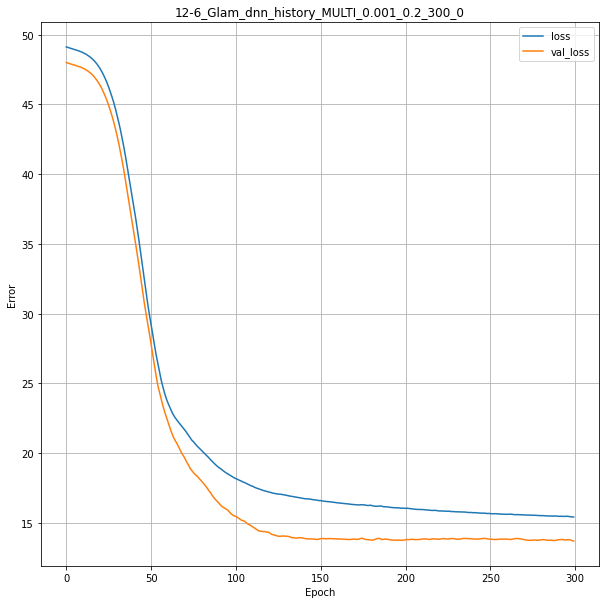

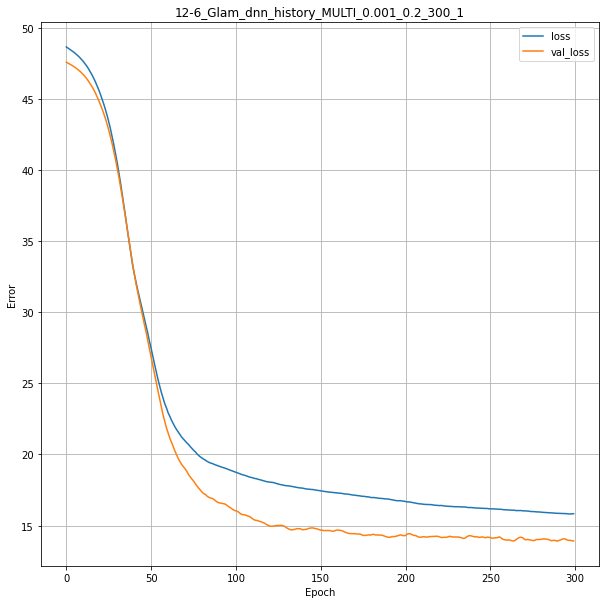

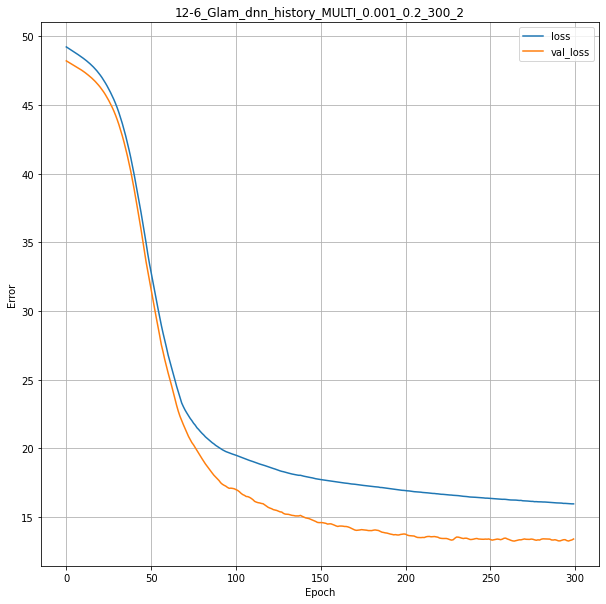

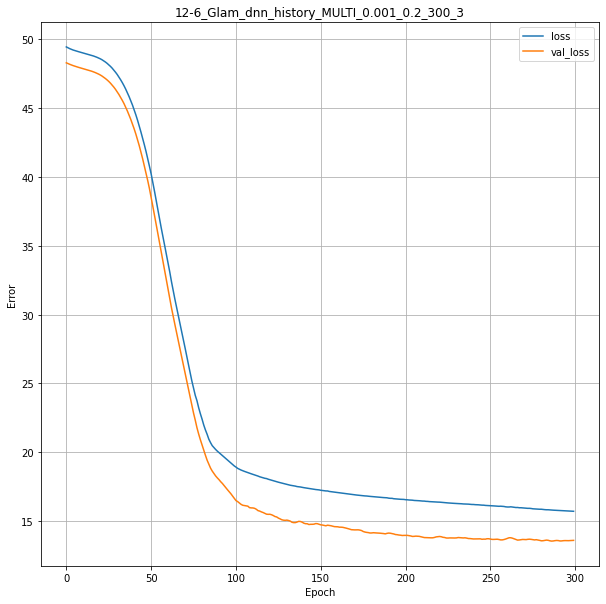

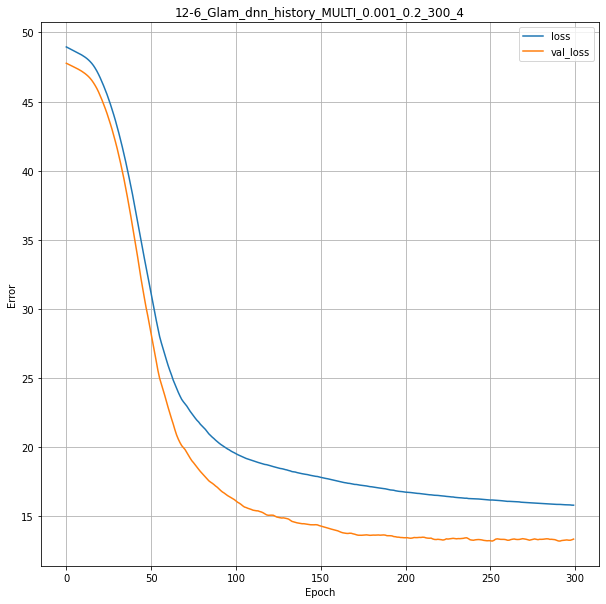

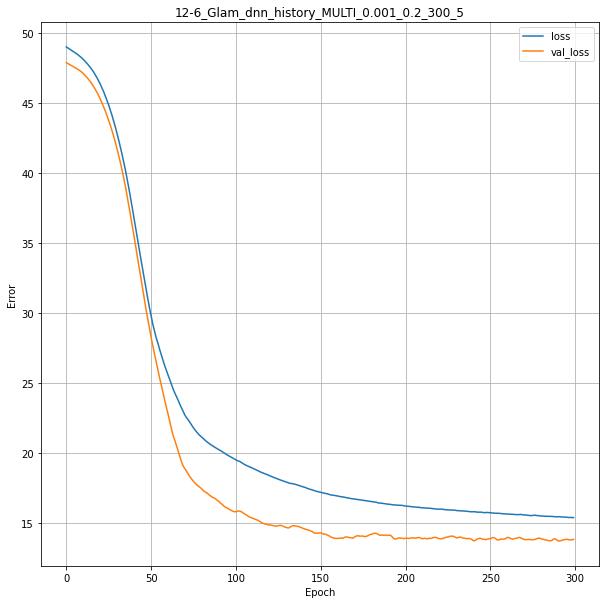

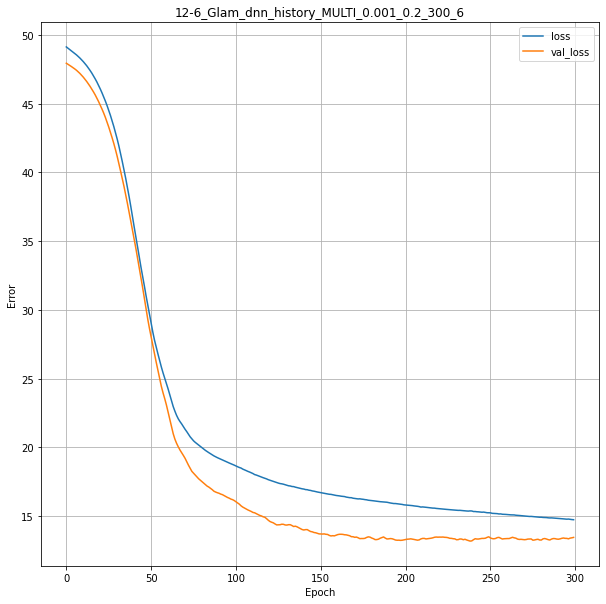

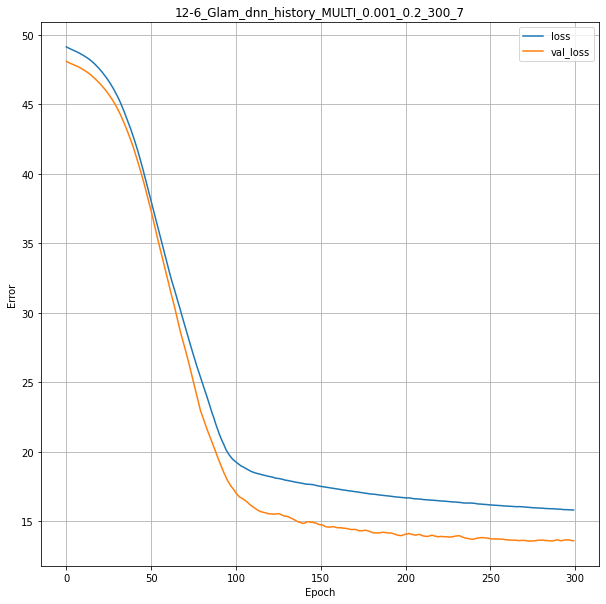

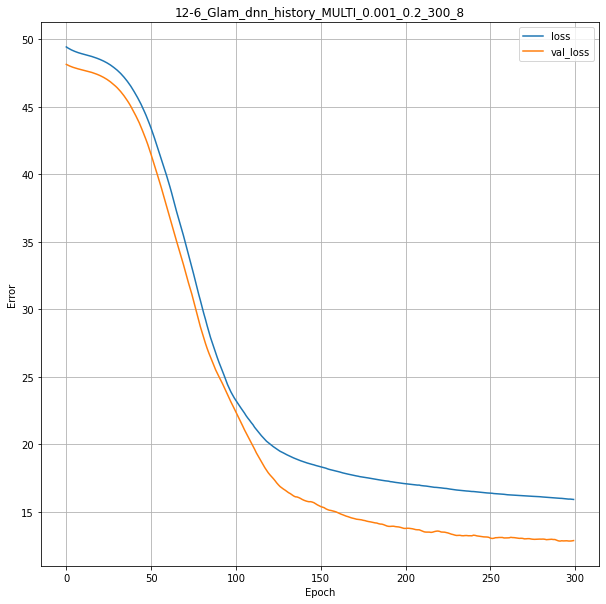

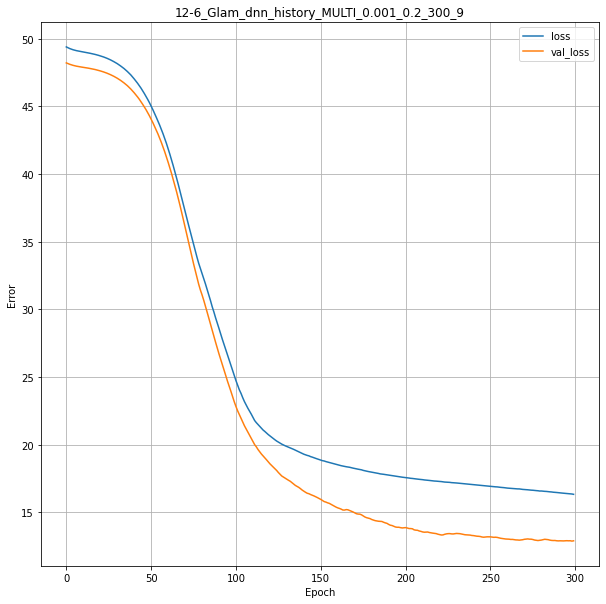

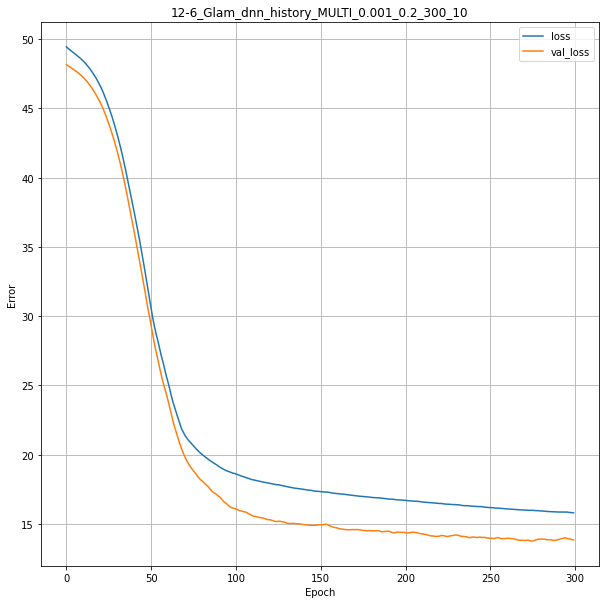

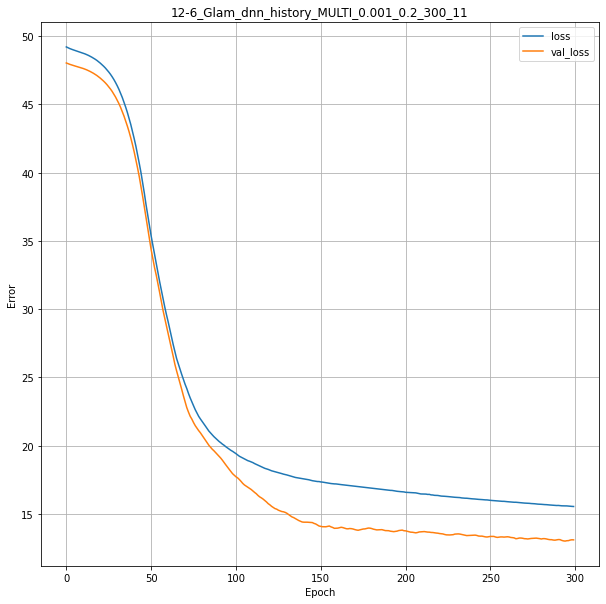

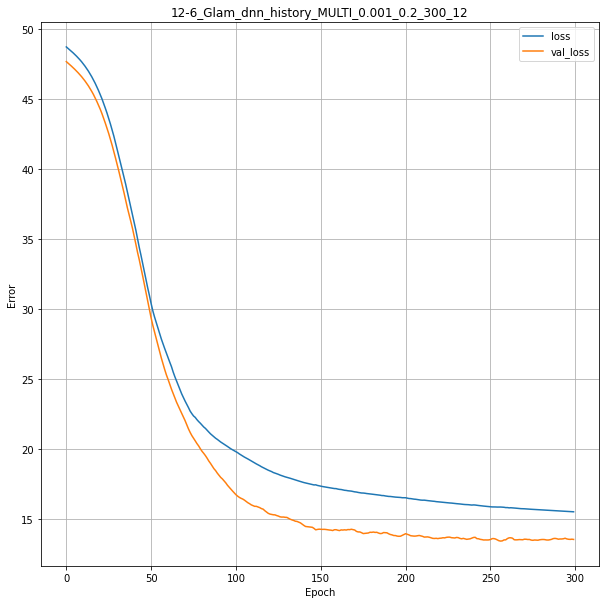

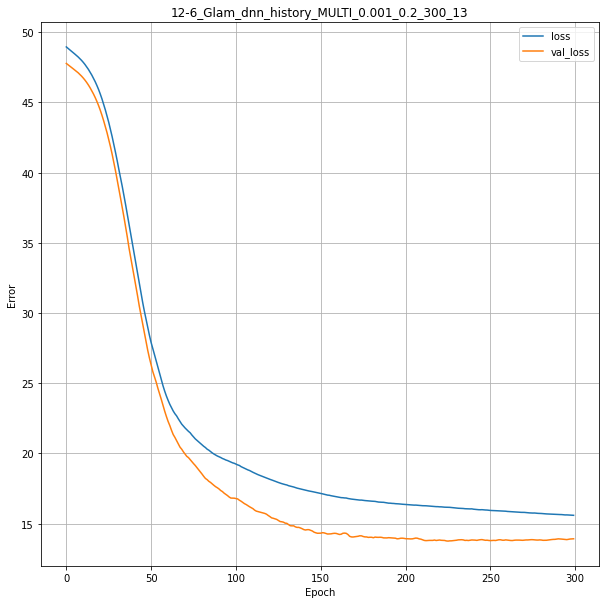

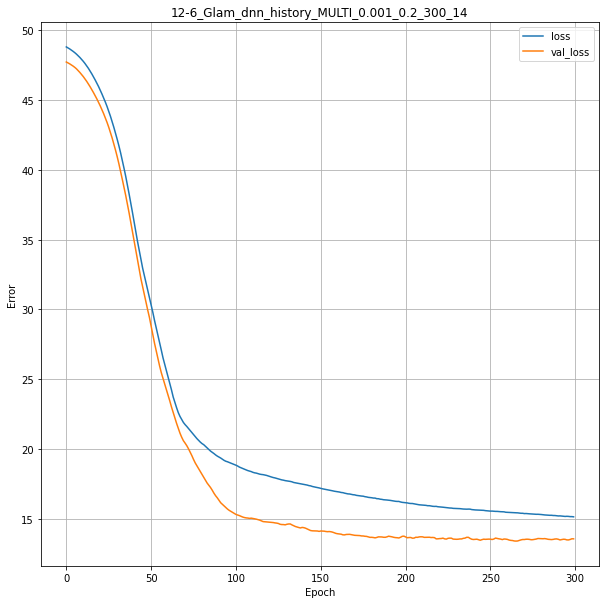

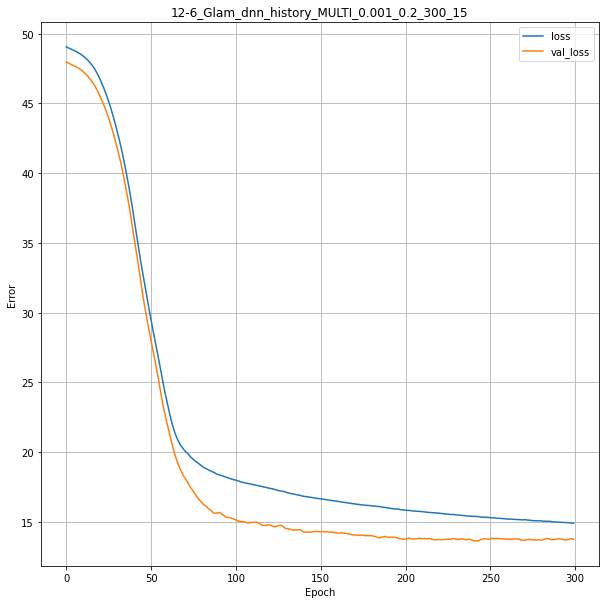

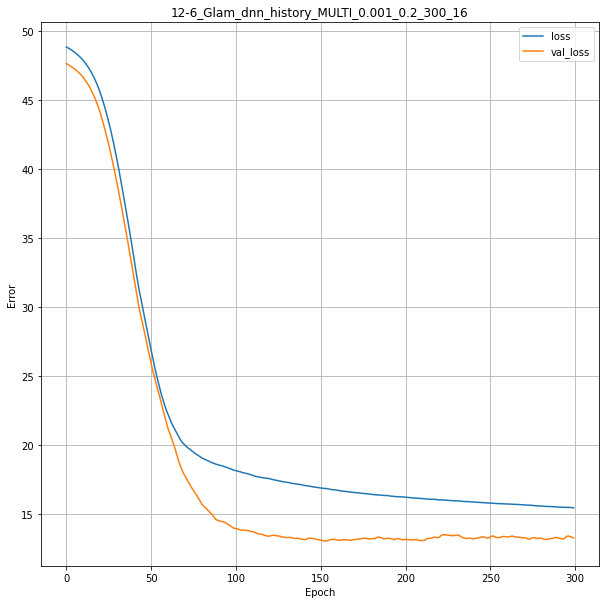

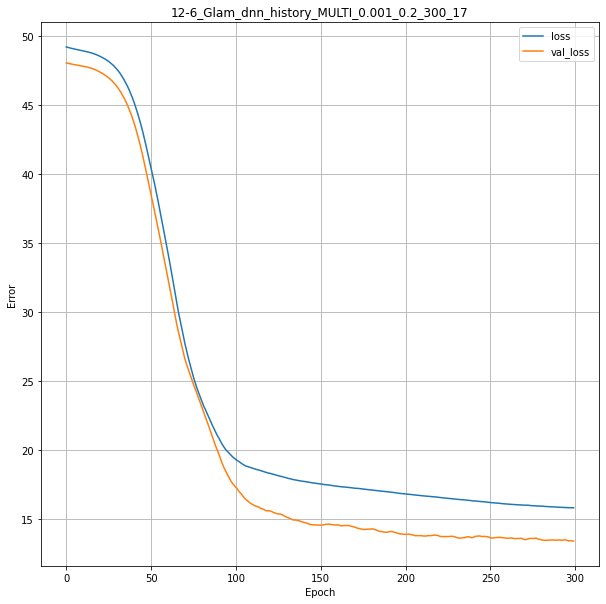

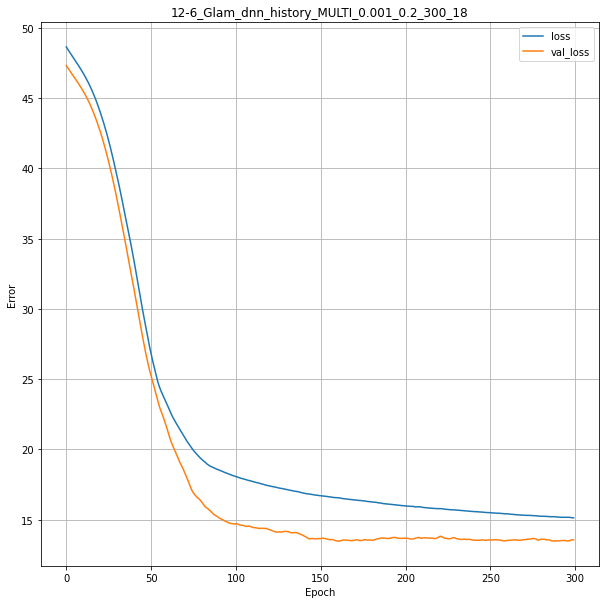

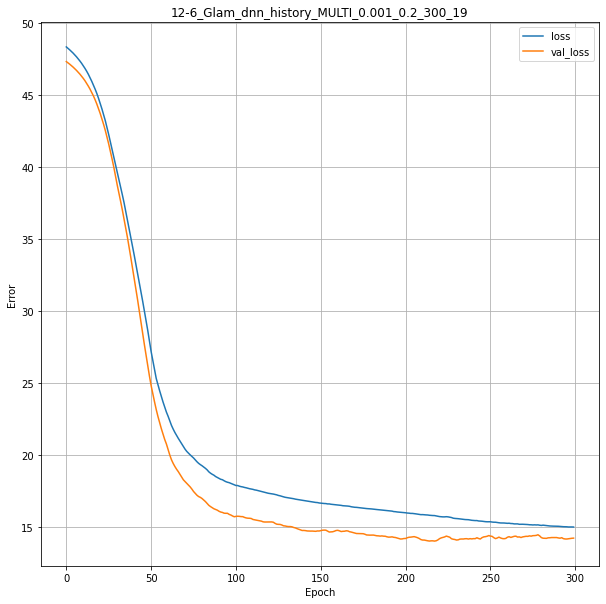

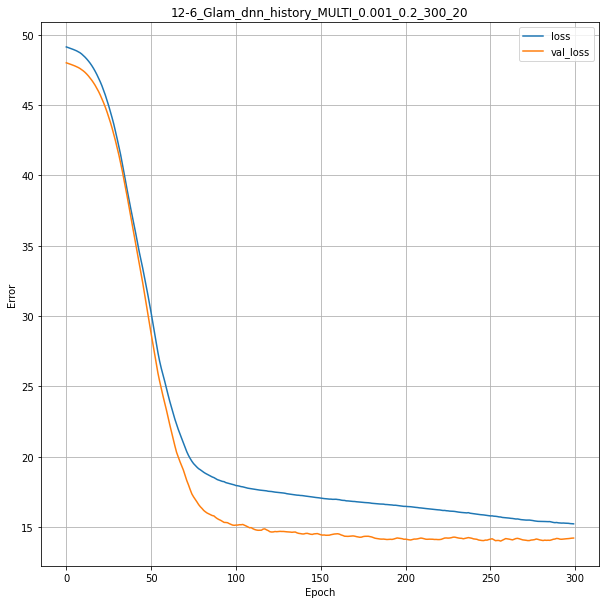

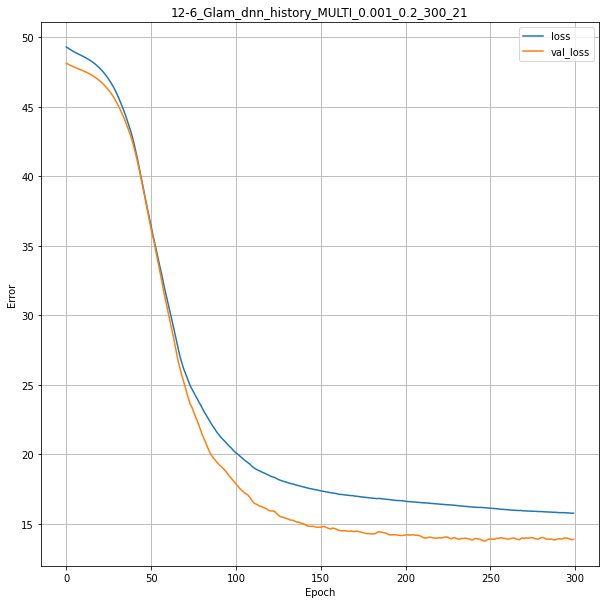

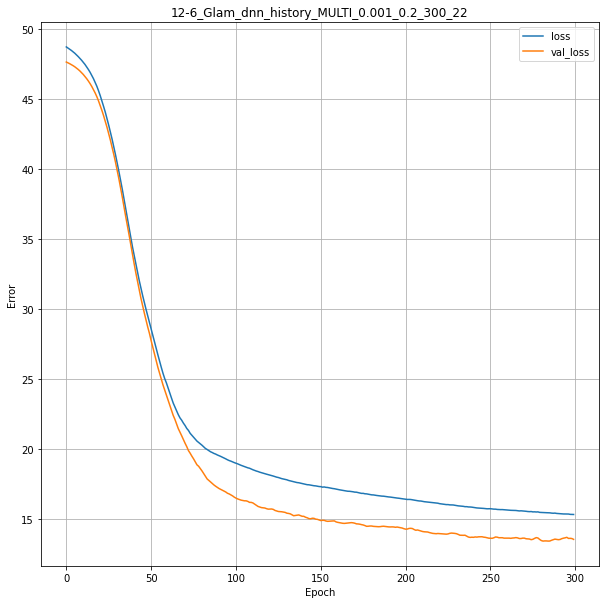

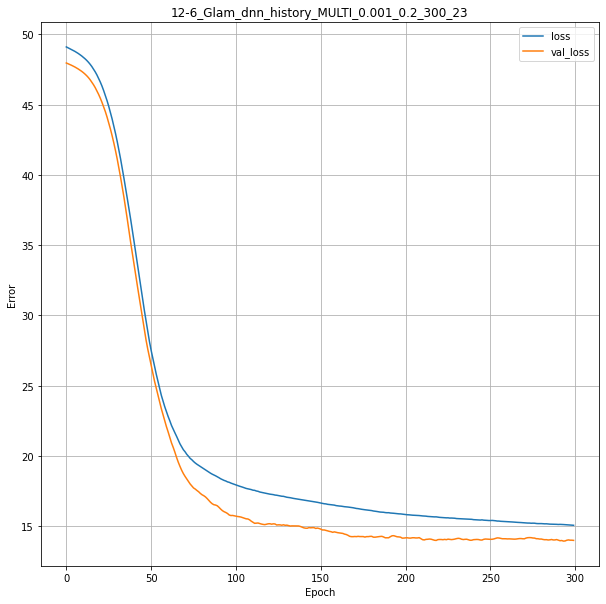

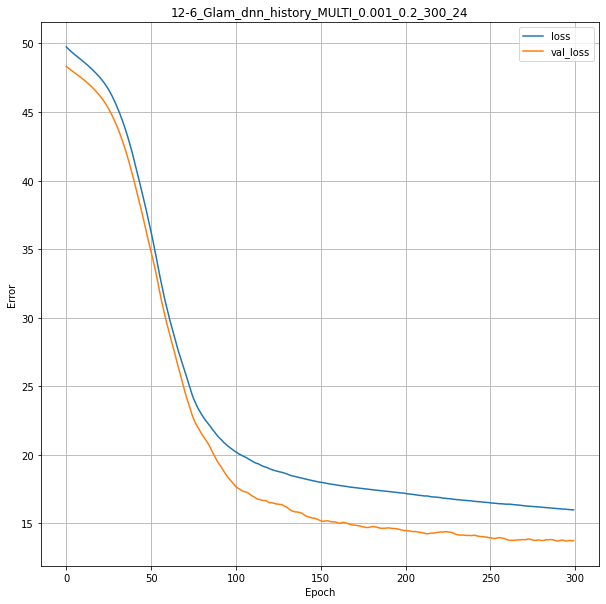

In [32]:
rootdir = 'saved_results/sr2/sr_' + arch + '/'
dnn_history = {}
for rs in RS: 
    dnn_history[
        arch + 
        '_Glam_dnn_history_MULTI_0.001_0.2_300_' + 
        str(rs)
    ] = pd.read_csv(
        rootdir + 
        'Glam_dnn_history_MULTI_0.001_0.2_300_' +
        str(rs)
    )
#     print(arch + '_Glam_dnn_history_MULTI_0.001_0.2_300_' + str(rs))

for hist in dnn_history:    
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    fig.patch.set_facecolor('w')
    ax.set_title(hist)
    gl.plot_loss(dnn_history[hist])

In [ ]:
# """
# This cell contains code to produce histograms of all the architectures different histories
# """


# df = deviations_Glam.iloc[:1]
# architecture = df['layer architecture'].loc[0]

# for rs in RS:
#     df = predictions[predictions['layer architecture'] == architecture]
#     fig,ax = plt.subplots()
#     ax.set_title('Layer architecture: ' + architecture)
#     ax.set_ylabel('prediction count')
#     ax.set_xlabel('thickness (m)')
#     fig.patch.set_facecolor('w')
#     plt.hist(df['avg test thickness'])

In [17]:
ccccombo_breaker()
# past this point is under construction. 
# here be monsters

NameError: name 'ccccombo_breaker' is not defined

In [ ]:
deviations

In [ ]:
dnn_history

In [ ]:
# load all histories
print('Loading histories....')
rootdir = 'saved_results/sr2/'
dnn_history = {}
arch = deviations['layer architecture'].iloc[[0]]
lr = deviations['learning rate'].iloc[[0]]
vs = deviations['validation split'].iloc[[0]]
print(arch)
print(lr)
print(vs)
for arch in tqdm(os.listdir(rootdir)):
    for folder in os.listdir(rootdir+arch):
        if 'MULTI' in folder:
            if 'dnn' in folder:

                dnn_history[arch[3:] + '_'+ folder] = pd.read_csv(rootdir+arch+'/'+folder)

In [ ]:
predictions = predictions.rename(columns = {'architecture':'layer architecture'})

In [ ]:
dfs = pd.DataFrame()
for rs in RS:
    print(rs)
    df = deviations.iloc[:1]
    s = pd.Series(dnn_model['10-5_Glam_dnn_MULTI_0.01_0.2_300_'+str(rs)].predict(RGI).flatten(), name = rs)
    dfs[rs] = s
#     break
#     dfs = dfs.assign(str(s))
print(s)
dfs


In [ ]:
for model in predictions[(predictions['learning rate'] == df['learning rate']) and (predictions['layer architecture'] == df['layer architecture'])]:
    fig,ax = plt.subplots()
    ax.set_title('Layer architecture: ' + architecture)
    ax.set_ylabel('prediction count')
    ax.set_xlabel('thickness (m)')
    fig.patch.set_facecolor('w')
    plt.hist(df['avg test thickness'])
# print(df)

In [ ]:
deviations = deviations.sort_values('test mae avg')
deviations

In [ ]:
"""
This cell contains code to produce histograms of all the architectures different histories
"""


df = deviations.iloc[:1]


for rs in RS:
    df = predictions[predictions['architecture'] == architecture]
    fig,ax = plt.subplots()
    ax.set_title('Layer architecture: ' + architecture)
    ax.set_ylabel('prediction count')
    ax.set_xlabel('thickness (m)')
    fig.patch.set_facecolor('w')
    plt.hist(df['avg test thickness'])
# print(df)

In [ ]:
# """
# This cell contains code to produce histograms of all the architectures different histories
# """

# for architecture in list(predictions['architecture'].unique()):
#     df = predictions[predictions['architecture'] == architecture]
#     fig,ax = plt.subplots()
#     ax.set_title('Layer architecture: ' + architecture)
#     ax.set_ylabel('prediction count')
#     ax.set_xlabel('thickness (m)')
#     fig.patch.set_facecolor('w')
#     plt.hist(df['avg test thickness'])
# # print(df)

In [ ]:
"""
This cell plots each random state loss curve for the 25 random states for each run
Also loads EVERY SINGLE MODEL currently and blows up the memory. Working on it.
"""
# for rs in RS:
for hist in dnn_history:    
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    fig.patch.set_facecolor('w')
    ax.set_title(hist)
    gl.plot_loss(dnn_history[hist])
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP_dnn_loss.eps")

In [ ]:
# for modl in dnn_modl:    
#     y = dnn_modl[modl].predict(test_features)
#     fig,ax=plt.subplots(1,1,figsize=(15,10))
#     fig.patch.set_facecolor('w')
#     plt.plot(test_labels,y,'.')
#     plt.plot((0,300),(0,300),'-')
#     plt.xlabel('True Thickness (m)')
#     plt.ylabel('Model Thickness (m)')
#     plt.xlim((0,300))
#     plt.ylim((0,300))
#     # plt.savefig("/home/sa42/notebooks/glac/figs/GTP_T")

In [ ]:
dnn_history

In [ ]:
dnn_model

In [ ]:
"""
This is a density plot of the most recent predictions made. Can easily be modified in a loop
to show multiple random states and whatnot
"""
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
deviations.sort_values('test mae avg')


In [ ]:
dnn_history

In [ ]:
qqq.iloc[0]

In [ ]:
# def plot_single_variable(x,y,model_type,model_name,feature_name):
#     y = model_type[model_name].predict(test_labels)
#     plt.scatter(train_features[feature_name], train_labels, label='Data')
#     plt.plot(x, y,'.', color='k', label='Predictions')
#     plt.xlabel(feature_name)
#     plt.ylabel('THICKNESS')
#     plt.legend()
#     plt.plot()

# x = test_labels
# for i, variable_name in enumerate(list(train_features)):
#     ax = plt.subplot(2,2,i+1)
#     model_name = (dataset.name 
#     + '_' 
#     + variable_name 
#     + '_' 
#     + str(lr) 
#     + '_' 
#     + str(vs) 
#     + '_' 
#     + str(ep))
#     plot_single_variable(x,y,dnn_model, model_name,variable_name)
# #     ax.set_ylim([35,140])
# #     ax.set_title(variable_name)
# #     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
# plt.tight_layout()

In [ ]:
# """
# This cell contains code to load models and histories.
# """

# # fix hyperparameters 
# lr = 0.1
# vs = 0.2
# # load models
# print('Loading models....')

# linear_model = {}
# dnn_model = {}
# # data is already split, however if other databases are used, then this line is needed
# # (train_features, test_features, train_labels, test_labels) = gl.data_splitter(glacier)
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#         pth_mod 
#         + 'glacier' 
#         + '_linear_' 
#         + variable_name 
#         + '_' 
#         + str(lr)
#         + '_'
#         + str(vs)
#         + '_'
#         + str(ep)
#         + '_'
#         + str(rs)
#         )

#         linear_model[
#             'glacier' x
#             + '_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = tf.keras.models.load_model(file_name)
        
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#         pth_mod 
#         + 'glacier' 
#         + '_dnn_' 
#         + variable_name 
#         + '_' 
#         + str(lr)
#         + '_'
#         + str(vs)
#         + '_'
#         + str(ep)
#         + '_'
#         + str(rs)
#         )

#         dnn_model[
#             'glacier'
#             + '_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = tf.keras.models.load_model(file_name)
# print('Models loaded')

# # load all histories
# print('Loading histories....')
# linear_history = {}
# dnn_history = {}
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#             pth_res 
#             + 'glacier' 
#             +'_linear_history_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         )

#         linear_history[
#             'glacier' 
#             +'_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ]= pd.read_csv(file_name)

# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#             pth_res 
#             + 'glacier_dnn_history_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         )

#         dnn_history[
#             'glacier' 
#             +'_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = pd.read_csv(file_name)
# print('Histories loaded')

In [ ]:

"""
This cell loads the loss histories from the original model with one dense layer of 64 nodes.
From these histories I extracted the lowest and final loss value and plotted them.
First is plotted the loss from using different learning rates with a fixed validation split. 
Then follows a plot of different validation splits using a fixed learning rate.
"""

# set up dictionaries
loss = {}
dnn_lr_history = {}
loss['glacier_min_learn'] = pd.DataFrame()
loss['glacier_fin_learn'] = pd.DataFrame()

# loop to define and then load histories
for lr in LR:
    file_name = (
    'sr/sr_64/'
    + 'glacier_dnn_history_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    file = (
    'glacier_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    
    
    dnn_lr_history[
    'glacier_MULTI_' 
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep)
    ] = pd.read_csv(file_name)
    
    # find minimum and insert other model hyperparameters into table
    m_loss = dnn_lr_history[file].min()
    m_loss['learning rate'] = str(lr)
    m_loss['validation split'] = str(vs)
    m_loss['epochs'] = str(ep)
    loss['glacier_min_learn'] = loss['glacier_min_learn'].append(m_loss,ignore_index=True)
    
    
    # find final and insert other model hyperparameters into table
    f = dnn_lr_history[file].last_valid_index()
    f_loss = dnn_lr_history[file].iloc[[f]]
    f_loss['learning rate'] = str(lr)
    f_loss['validation split'] = str(vs)
    f_loss['epochs'] = str(ep)

    loss['glacier_fin_learn'] = loss['glacier_fin_learn'].append(f_loss,ignore_index=True)

loss['glacier_fin_learn'] = loss['glacier_fin_learn'].rename(columns = {
    'loss':'loss_final',
    'val_loss':'val_loss_final'
})

loss['glacier_min_learn'] = loss['glacier_min_learn'].rename(columns = {
    'loss':'loss_minimum',
    'val_loss':'val_loss_minimum'
})
    
print('Results compiled')
sns.set(rc={"figure.figsize":(15,10)})
ax = plt.gca()
ax.set_ylim([5,30])
# loss['glacier_min'].plot(x='validation split', y = ['loss_minimum', 'val_loss_minimum'], kind='bar',  ax=ax)
# loss['glacier_fin'].plot(x='validation split', y = ['loss_final', 'val_loss_final'], kind='bar',  ax=ax)

loss['glacier_fin_learn'].plot(x='learning rate', y = 'loss_final',color = 'blue',  ax=ax)
loss['glacier_fin_learn'].plot(x='learning rate', y = 'val_loss_final',color = 'green', ax=ax)
loss['glacier_min_learn'].plot(x='learning rate', y = 'loss_minimum', color = 'red', ax=ax)
loss['glacier_min_learn'].plot(x='learning rate', y = 'val_loss_minimum',color = 'orange', ax=ax)
ax.set_xlabel('Learning rate at fixed validation split = 0.2')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('GlaThiDa Glacier scale dataset multivariable regression hyperparameterization')
plt.show()
plt.tight_layout()



# repeat above loop with fixed lr and varied vs
lr = 0.1
loss = {}
dnn_vs_history = {}
loss['glacier_min_valsplit'] = pd.DataFrame()
loss['glacier_fin_valsplit'] = pd.DataFrame()
for vs in VS:
    file_name = (
    'sr/sr_64/'
    + 'glacier_dnn_history_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    file = (
    'glacier_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    
    
    dnn_lr_history[
    'glacier_MULTI_' 
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep)
    ] = pd.read_csv(file_name)
    
    
    m_loss = dnn_lr_history[file].min()
    m_loss['learning rate'] = str(lr)
    m_loss['validation split'] = str(vs)
    m_loss['epochs'] = str(ep)
    loss['glacier_min_valsplit'] = loss['glacier_min_valsplit'].append(m_loss,ignore_index=True)

    f = dnn_lr_history[file].last_valid_index()
    f_loss = dnn_lr_history[file].iloc[[f]]
    f_loss['learning rate'] = str(lr)
    f_loss['validation split'] = str(vs)
    f_loss['epochs'] = str(ep)

    loss['glacier_fin_valsplit'] = loss['glacier_fin_valsplit'].append(f_loss,ignore_index=True)

loss['glacier_fin_valsplit'] = loss['glacier_fin_valsplit'].rename(columns = {
    'loss':'loss_final',
    'val_loss':'val_loss_final'
})

loss['glacier_min_valsplit'] = loss['glacier_min_valsplit'].rename(columns = {
    'loss':'loss_minimum',
    'val_loss':'val_loss_minimum'
})
    
print('Results compiled')
sns.set(rc={"figure.figsize":(15,10)})
ax = plt.gca()
ax.set_ylim([5,30])
# loss['glacier_min'].plot(x='validation split', y = ['loss_minimum', 'val_loss_minimum'], kind='bar',  ax=ax)
# loss['glacier_fin'].plot(x='validation split', y = ['loss_final', 'val_loss_final'], kind='bar',  ax=ax)

loss['glacier_fin_valsplit'].plot(x='validation split', y = 'loss_final',color = 'blue',  ax=ax)
loss['glacier_fin_valsplit'].plot(x='validation split', y = 'val_loss_final',color = 'green', ax=ax)
loss['glacier_min_valsplit'].plot(x='validation split', y = 'loss_minimum', color = 'red', ax=ax)
loss['glacier_min_valsplit'].plot(x='validation split', y = 'val_loss_minimum',color = 'orange', ax=ax)
ax.set_xlabel('Validation splits with learning rate = 0.1')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('GlaThiDa Glacier scale dataset multivariable regression hyperparameterization')
plt.show()
plt.tight_layout()

In [ ]:
"""
This cell computes the true average thickness of the glaciers in use
"""


pth = '/data/fast1/glacierml/T_models/'
T_lab = pd.read_csv(pth + 'T.csv', low_memory = False)
T_lab = T_lab[[
    'GlaThiDa_ID',
    'LAT',
    'LON',
    'AREA',
    'MEAN_SLOPE',
    'MEAN_THICKNESS'
]]
T_lab = T_lab.dropna()

tru_thickness = np.sum(T_lab['MEAN_THICKNESS']) / len(T_lab['MEAN_THICKNESS'])
tru_thickness